In [1]:
import cv2 as cv
import numpy as np
import scipy
import time
from matplotlib import pyplot as plt
from numpy import linalg
import math

In [2]:
img = plt.imread("C:/Users/nimac/MyProjects/vision/HW/HW2/Books.JPG")

In [3]:
# cv.destroyAllWindows()
# cv.namedWindow('base', cv.WINDOW_NORMAL,)

# ix, iy = 1, 1
# def func(event,x,y,flags,param):
#     global ix,iy
#     if event == cv.EVENT_LBUTTONDBLCLK:
#         ix,iy = x,y

# cv.setMouseCallback('base',func)

# while(1):
#     cv.imshow("base", np.uint8(img))
#     k = cv.waitKey(20) & 0xFF
#     if k == 27:
#         break
#     elif k == ord('a'):
#         print(ix,iy)
# cv.waitKey(0)



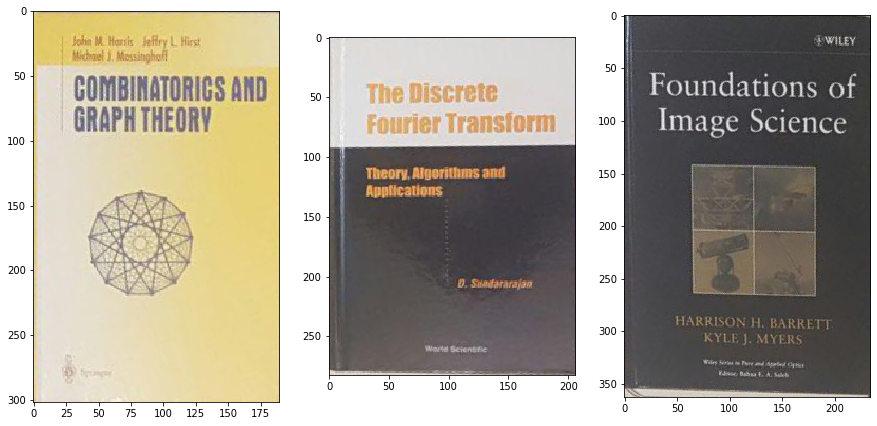

In [5]:
row = img.shape[0];
col = img.shape[1];
book1 = np.array([[665, 214], [603, 394], [320, 287]], np.float32)
book2 = np.array([[359, 740], [155, 705], [205, 426]], np.float32)
book3 = np.array([[806, 969], [612, 1100], [423, 789]], np.float32)
all_books = [book1, book2, book3]

def get_transform_coeff(x: np.ndarray, y: np.ndarray):
    A = [[x[0,0], x[0, 1], 1], [x[1,0], x[1, 1], 1], [x[2,0], x[2, 1], 1]]
    b1 = [y[0, 0], y[1, 0], y[2, 0]]
    b2 = [y[0, 1], y[1, 1], y[2, 1]]
    
#     a1 = linalg.solve(A, b1)
#     a2 = linalg.solve(A, b2)
    a3 = np.dot(np.linalg.inv(A), b1)
    a4 = np.dot(np.linalg.inv(A), b2)
#     res = np.array([a1, a2], np.float32)
    res = np.array([a3, a4], np.float32)
    return res

def distance(x, y):
    return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

book_img = []
for book in all_books:
    a = distance(book[0], book[1])
    b = distance(book[1], book[2])
    pos = np.array([[0,0], [a, 0], [a, b]], np.float32)
    book_img.append(cv.warpAffine(np.uint8(img), get_transform_coeff(book, pos), (int(a), int(b))))

_, axs = plt.subplots(1, 3, figsize=(15, 15))
axs = axs.flatten()
for i in range(3):
    axs[i].imshow(book_img[i])
    plt.imsave(f'Q3_book{i}.jpg', book_img[i])
plt.show()


<div dir="rtl">
طبق رابطه زیر کافی است تا ۲ معادله را حل کنیم تا ۶ مجهولمان بدست آید که البته هر معادله در اصل در ۳ نقطه باید صدق کند که یعنی ۶ معادله و ۶ مجهول. حل کردن این معدلات چون حالت خطی و ساده دارند کار آسانی است:
</div>

$\begin{bmatrix}a_1 & a_2 & t_1\\a_3 & a_4 & t_2\\ 0 & 0 & 1 \end{bmatrix} \times \begin{bmatrix} x\\y\\1 \end{bmatrix} = \begin{bmatrix} x'\\ y'\\ 1 \end{bmatrix}$


$a_1x_1 + a_2y_1 + t_1 = x'_1$

$a_3x_1 + a_4y_1 + t_2 = y'_1$

$a_1x_2 + a_2y_2 + t_1 = x'_2$

$a_3x_2 + a_4y_2 + t_2 = y'_2$

$a_1x_3 + a_2y_3 + t_1 = x'_3$

$a_3x_3 + a_4y_3 + t_2 = y'_3$


البته با روش زیر قابل حل است:

$A = \begin{bmatrix}x_1 & y_1 & 1\\x_2 & y_2 & 1\\ x_3 & y_3 & 1 \end{bmatrix}$

$X = \begin{bmatrix} a_1\\a_2\\t_1 \end{bmatrix}$

$Y = \begin{bmatrix} a_3\\a_4\\t_2 \end{bmatrix}$

$b_1=\begin{bmatrix} x_1'\\ x_2'\\ x_3' \end{bmatrix}$

$b_2=\begin{bmatrix} y_1'\\ y_2'\\ y_3' \end{bmatrix}$

$AX = b_1$

$AY = b_2$

$x = A^{-1}b$


<div dir="rtl">
برای حل معادله می توانید هم از روش گفته شده و هم از معادله حل کن کتابخانه نام پای استفاده کنید که در کد بالا به صورت کامنت است، ولی هر دو روش درست هستند و به جواب مورد نظر می رسیم
</div>
<div dir="rtl">
در کد فرض شده که ترتیب نقاط داده شده، به ترتیب برابر بالا چپ، بالا راست و پایین راست تصویر هستند و از همین نسبت برای ساخت تصویر نهایی استفاده شده یعنی مقادیر طول و عرض کتاب، حفظ شده اند.
</div>